<a href="https://colab.research.google.com/github/ilman79/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-1/blob/main/Study_Case_2_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT DATA

In [103]:
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    print("Installing the required modules")
    !pip install --upgrade umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Installing the required modules
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-12 08:53:34--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.3’

tau_unsup.py.3      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-12 08:53:34 (76.2 MB/s) - ‘tau_unsup.py.3’ saved [17387/17387]



In [104]:
import pandas as pd

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/ilman79/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-1/main/Data/Case-Study-02-MixITup%20(1).csv')
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0,Selasa,0


sudah melakukan missing value di excel,

*   Sudah melakukan missing value di excel
*   variabel pendapatan-per-bulan,
variabel jenis kelamin,


In [106]:
# drop kolom yang tidak terpakai
df.drop(["ID"], axis=1, inplace=True)
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jenis Kelamin         200 non-null    object
 1   Umur                  200 non-null    int64 
 2   Pendapatan-per-bulan  200 non-null    int64 
 3   skor-pengeluaran      200 non-null    int64 
 4   Menikah               200 non-null    int64 
 5   Kota                  200 non-null    object
 6   Promo                 200 non-null    int64 
 7   HariFav               200 non-null    object
 8   FavFlavor             200 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.2+ KB


In [108]:
df['Menikah'] = df['Menikah'] .astype('category')
df['Kota'] = df['Kota'] .astype('category')
df['Promo'] = df['Promo'] .astype('category')
df['HariFav'] = df['HariFav'] .astype('category')
df['FavFlavor'] = df['FavFlavor'] .astype('category')
df['Jenis Kelamin'] = df['Jenis Kelamin'] .astype('category')
df['Promo'] = df['Promo'] .astype('category')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         200 non-null    category
 1   Umur                  200 non-null    int64   
 2   Pendapatan-per-bulan  200 non-null    int64   
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               200 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 200 non-null    category
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    category
dtypes: category(6), int64(3)
memory usage: 7.3 KB


In [110]:
df.duplicated().sum()

0

In [111]:
df.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [112]:
# fungsi untuk menampilkan boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
def boxplot_outlier(box):
  fig, ax = plt.subplots(figsize = (8,7))
  sns.boxplot(x = box)

In [113]:
# fungsi untuk menampilkan boxplot 

def boxplot_outlier(box):
  fig, ax = plt.subplots(figsize = (8,7))
  sns.boxplot(x = box)

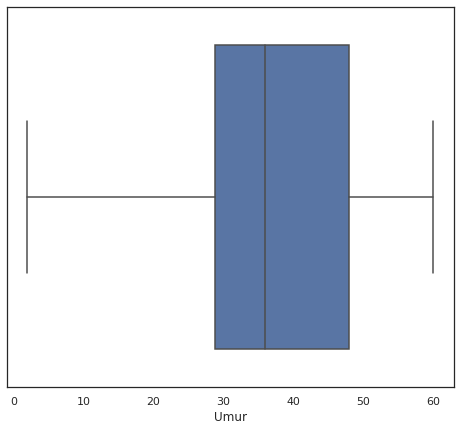

In [114]:
# fungsi untuk menampilkan batas atas dan batas bawah

def batas(batas):
  Q1 = batas.quatile(0.25) 
  Q3 = batas.quatile(0.75)

  IQR = Q3 - Q1

  global batasBawah
  batasBawah = Q1 - (1.5 * IQR) 

  global batasAtas
  batasBawah = Q3 + (1.5 * IQR)

  print("Batas Bawah = ", batasBawah, "\nBatas Atas = ", batasAtas)
def show_outlier(file, column):
  return file[(column < batasBawah) | (column > batasAtas)]

boxplot_outlier(df.Umur)

In [115]:
df

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0


In [116]:
JK = pd.get_dummies(df['Jenis Kelamin'], prefix='Gender')
JK.head()

,Gender_Pria,Gender_Wanita
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [117]:
kota = pd.get_dummies(df['Kota'], prefix='Kota')
kota.head()

,Kota_Depok,Kota_Jakarta,Kota_Tangerang
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [118]:
df2 = pd.concat([df, kota, JK], axis = 1)
df2.head().transpose()

,0,1,2,3,4
Jenis Kelamin,Wanita,Wanita,Pria,Pria,Wanita
Umur,49,32,51,19,38
Pendapatan-per-bulan,13114754,33606557,15983606,12704918,20081967
skor-pengeluaran,52,86,41,55,42
Menikah,1,1,1,0,1
Kota,Jakarta,Depok,Jakarta,Jakarta,Jakarta
Promo,1,1,2,1,2
HariFav,Sabtu,Minggu,Minggu,Rabu,Senin
FavFlavor,2,6,3,7,8
Kota_Depok,0,1,0,0,0


In [119]:
df2

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,Kota_Depok,Kota_Jakarta,Kota_Tangerang,Gender_Pria,Gender_Wanita
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2,0,1,0,0,1
1,Wanita,32,33606557,86,1,Depok,1,Minggu,6,1,0,0,0,1
2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3,0,1,0,1,0
3,Pria,19,12704918,55,0,Jakarta,1,Rabu,7,0,1,0,1,0
4,Wanita,38,20081967,42,1,Jakarta,2,Senin,8,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Pria,31,4098360,73,1,Depok,1,Senin,0,1,0,0,1,0
196,Pria,57,15983606,51,1,Jakarta,1,Minggu,5,0,1,0,1,0
197,Wanita,35,43032786,79,1,Depok,1,Senin,7,1,0,0,0,1
198,Wanita,23,1229508,94,1,Depok,0,Selasa,0,1,0,0,0,1


# CLUSTERING

In [120]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1193.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22, cost: 1100.0
Run 1, iteration: 2/100, moves: 0, cost: 1100.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12, cost: 1075.0
Init: initializing centroids
Ini

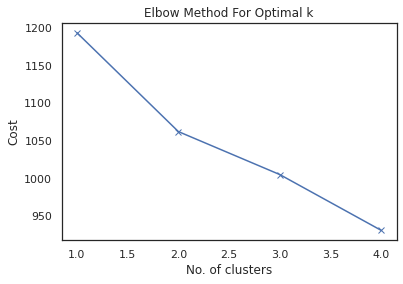

In [122]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [123]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df2)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 1210.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 51, cost: 1294.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 19, cost: 1192.0
Run 4, iteration: 2/100, moves: 1, cost: 1192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14, cost: 1210.0
Best run was number 2


array([2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0,
       1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1,
       1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 0,
       0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 0], dtype=uint16)

In [124]:
df.insert(0, "Cluster", clusters, True)
df

,Cluster,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,2,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,1,Wanita,32,33606557,86,1,Depok,1,Minggu,6
2,2,Pria,51,15983606,41,1,Jakarta,2,Minggu,3
3,2,Pria,19,12704918,55,0,Jakarta,1,Rabu,7
4,2,Wanita,38,20081967,42,1,Jakarta,2,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,1,Pria,31,4098360,73,1,Depok,1,Senin,0
196,2,Pria,57,15983606,51,1,Jakarta,1,Minggu,5
197,1,Wanita,35,43032786,79,1,Depok,1,Senin,7
198,1,Wanita,23,1229508,94,1,Depok,0,Selasa,0


#VISUALISASI DATA

In [125]:
numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

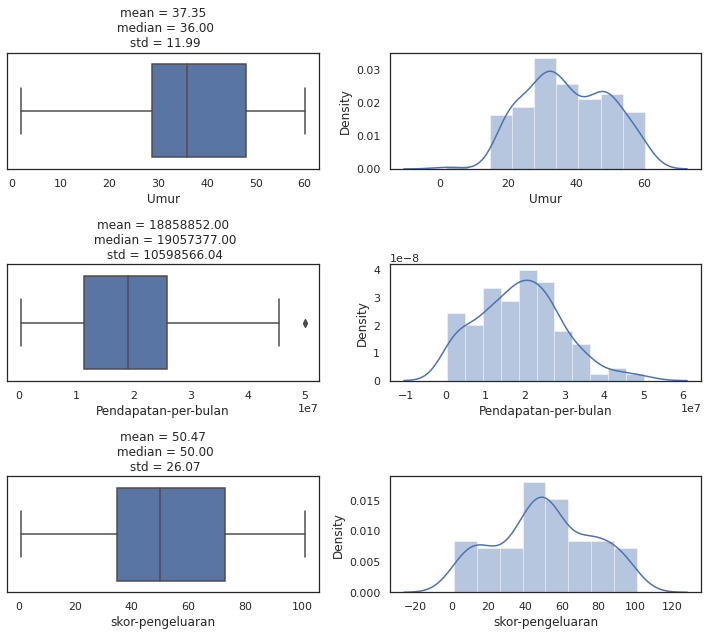

In [126]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    p1=sns.boxplot(df[kol], ax = axs[i][0])
	    p2=sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
observasi_num(numerik)

Interpretasi
Berdasarkan visualisasi di atas dapat dilihat bahwa rata-rata umur pengunjung yang datang ke MixItup adalah 37 tahun. Dengan usia pengunjung terbanyak ada di umur 30 tahunan. Adapun rata-rata pendapatan perbulan ialah Rp18.858.852. Dan rata-rata pengunjung MixItup berbelanja sebanyak 50 kali.

In [127]:
kategorik = ['Jenis Kelamin','Menikah','Kota', 'Promo', 'HariFav', 'FavFlavor']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

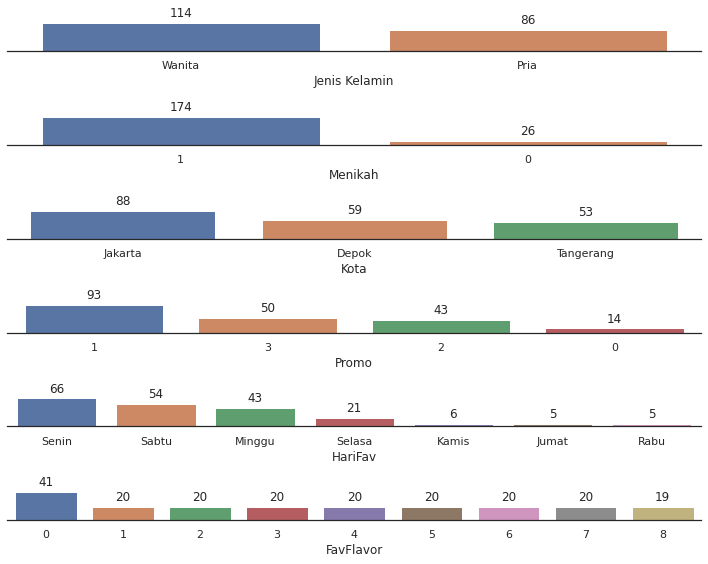

In [128]:
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(6,1,figsize=(10, 8)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol2 in enumerate(kategorik):  
    # Membuat Plot
    sns.countplot(df[kol2], order = df[kol2].value_counts().index, ax = axs[i])  
    
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Visualisasi menceritakan bahwa pengunjung MixITup lebih banyak perempuan daripada laki-laki. Dari sini, hal yang dapat kita kembangkan di MixITup adalah memberikan nuansa yang tidak terlalu girly agar dapat menarik lebih banyak pengunjung laki-laki dan membuat pengunjung laki-laki tetap nyaman. Laki-laki cenderung lebih suka dengan kopi. Maka, direkomendasikan untuk menambahkan menu yang didominasi oleh kopi dan macam-macam snack pendamping kopi. 

Dapat kita lihat banyak pengunjung MixITup yang sudah berstatus menikah. Dari sini, hal yang dapat kita kembangkan di MixITup adalah memberikan nuansa yang lebih modern dan tempat yang nyaman untuk berkumpul dengan teman, keluarga sehingga banyak pengunjung yang belum nikah dapat berkunjung ke MixITup

Dapat kita lihat dari visualisasi kota kita tahu bahwa banyak pengunjung MixITup dari kota Jakarta. Dari sini, kita dapat merekomendasikan untuk tempat yang berada di Depok dan Tangerang harus memilih lokasi yang strategis dan terjangkau oleh kendaraan umum.

Dapat kita lihat dari visualisasi promo dan hariFav, kita tahu bahwa banyak pengunjung MixITup jarang menggunakan promo yang telah diberikan dari toko MixITup. Maka insight yang diberikan adalah menaikan promo yang diberikan dan berikan tambahan promo di hari Rabu, Kamis, Jumat untuk menambahkan daya tarik pengunjung agar MixITup menjadi lebih ramai di hari tersebut. Atau jika dirasa MixITup belum dapat menambahkan promo, silahkan kurangi pegawai yang ada di hari yang sepi pengunjung yaitu Rabu, Kamis, Jum'at.

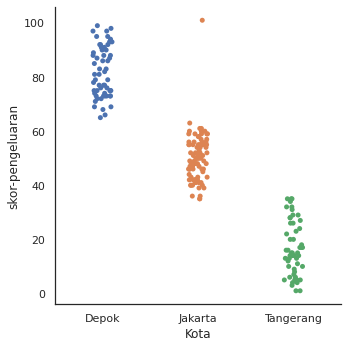

In [129]:
p = sns.catplot(x="Kota", y="skor-pengeluaran", data=df2)

Interpretasi

Dapat dilihat bahwa kota Depok menjadi kota terbanyak yang pengeluaran costumer di MixItup

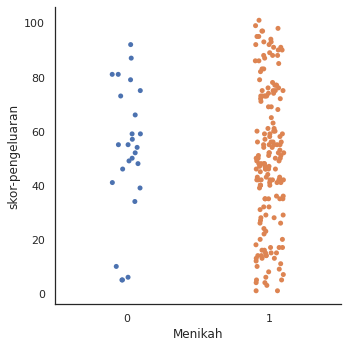

In [130]:
p = sns.catplot(x="Menikah", y="skor-pengeluaran", data=df2)

Dari visualisasi, pengunjung dengan status sudah menikah lebih sering berkunjung. Oleh karena itu insight yang dapat diberikan adalah dengan mengalokasikan setengah dari pendanaan yang berjumlah 33 Milyar ke renovasi dan pembaharuan nuansa MixITup menjadi lebih kekinian.

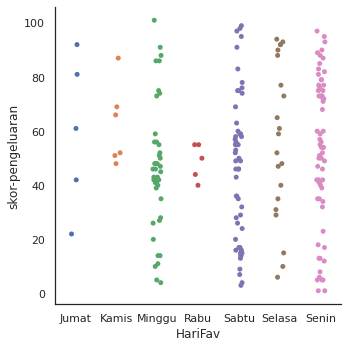

In [131]:
p = sns.catplot(x="HariFav", y="skor-pengeluaran", data=df2)

Dapat dilihat bahwa besar pengeluaran customer di MixITUp terbanyak ada di hari Sabtu, Minggu dan Senin. Sementara hari Jumat dan Rabu besar pengeluaran customer di MixITUp sedikit

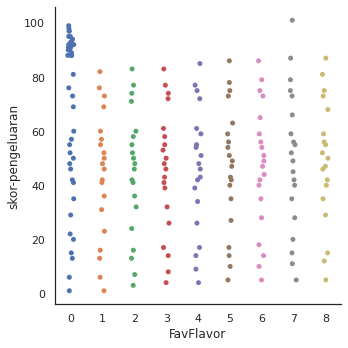

In [132]:
p = sns.catplot(x="FavFlavor", y="skor-pengeluaran", data=df2)

Visualisasi menampilkan bahwa produk MixITup dengan rasa Vanilla cenderung lebih banyak diminati karena memiliki skor pengeluaran yang cenderung lebih tinggi daripada rasa lain. Oleh karena itu, insight yang dapat diberikan adalah menyiapkan stok bahan untuk produk rasa vanilla lebih banyak dan memberikan promo diskon untuk rasa lain agar produk dengan rasa lain juga menghasilkan penjualan lebih banyak.

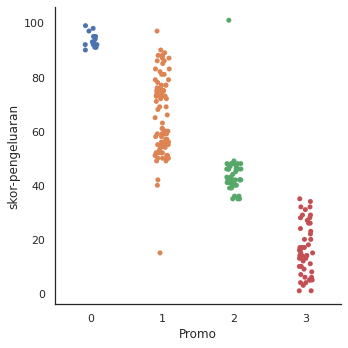

In [133]:
p = sns.catplot(x="Promo", y="skor-pengeluaran", data=df2)

**Dari visualisasi di atas dapat dilihat bahwa pengunjung MixITup yang paling sering beli adalah wanita dengan umur 32 tahun. Hal tersebut diduga karena tempat yang nyaman memungkinkan wanita tersebut menyelesaikan perkerjaannya di MixItup.**


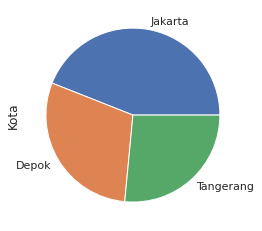

In [134]:
df.Kota.value_counts().plot(kind='pie')

Visualisasi menceritakan bahwa pengunjung MixITup lebih banyak mendaftarkan loyality program di kota Jakarta. Dari sini, dapat kita kembangkan loyality program dengan menarik agar pengunjung lain dapat merekomendasikan kepada orang-orang terdekat. MixITup dapat membuat loyality program agar pengunjung tertarik mengumpulkan point yang bisa di redeem untuk diskon dan hadiah menarik lainnya.

#KESIMPULAN DAN FEEDBACK UNTUK PERUSAHAAN


1. Visualisasi menceritakan bahwa pengunjung MixITup lebih banyak perempuan 
daripada laki-laki. Dari sini, hal yang dapat kita kembangkan di MixITup adalah memberikan nuansa yang tidak terlalu girly agar dapat menarik lebih banyak pengunjung laki-laki dan membuat pengunjung laki-laki tetap nyaman. Laki-laki cenderung lebih suka dengan kopi. Maka, direkomendasikan untuk menambahkan menu yang didominasi oleh kopi dan macam-macam snack pendamping kopi. 

2. Direkomendasikan juga untuk menyediakan mushola yang memiliki fasilitas lengkap dan nyaman agar pengunjung Muslim dapat berlama-lama di MixITup tanpa perlu keluar area MixITup saat waktu sholat. Sehingga, semakin lama pengunjung di MixITup, memungkinkan pengunjung untuk menambah pesanan.

3. Dari visualisasi di atas dapat dilihat bahwa pengunjung MixITup yang paling sering beli adalah wanita dengan umur 32 tahun. Hal tersebut diduga karena tempat yang nyaman memungkinkan wanita tersebut menyelesaikan perkerjaannya di MixItup. 

4. Pendapatan perbulan terbesar Rp 50.000.000 dan skor pengeluaran terbesar 100.Cara agar customer yang memiliki pendapatan terbesar agar lebih sering berkunjung di MixITup untuk
- Banyak menyediakan tempat yang nyaman dan luas, 
- Bisa digunakan untuk bekerja, 
- Menjadi sport kekinian, 
- Parkiran yang luas
- Tempat yang strategis

